In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style('darkgrid')

1. Niech $f(x) = e^{x^2-1}$. Korzystając z wielomianu Lagrange’a $p_4(x)$ interpolującego $f(x)$, skonstruowanego na podstawie danych $f(1.0) = 1.00000$, $f(1.2) = 1.55271$, $f(1.4) = 2.61170$, $f(1.1) = 1.23368$, $f(1.3) = 1.99372$ podaj przybliżoną wartość $f(1.25)$. Oszacuj błąd aproksymacj  i porównaj wynik z wartością |$f(1.25)−p4(1.25)$| uzyskaną za pomocą komputera.

In [3]:
X = [1, 1.2, 1.4, 1.1, 1.3]
Y = [1, 1.55271,  2.61170,  1.23368,  1.99372]

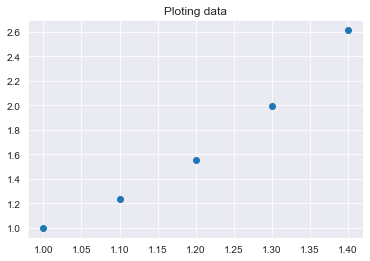

In [5]:
plt.scatter(X,Y)
plt.title('Ploting data')
plt.show()

In [9]:
def pn(x, X, Y):
    n = len(X)
    re_list = np.zeros(n)
    for i in range(n):
        frac = 1
        for j in range(n):
            if i != j:
                frac *= (x - X[j])/(X[i]-X[j])

        re_list[i] = Y[i]*frac

    result = np.sum(re_list)

    return result

In [13]:
p4 = pn(1.25, X, Y)
p4

1.7549609375

In [37]:
def fu(x):

    n = len(x)
    li = np.zeros(n)

    for i in range(n):
        li[i] = np.exp(x[i]**2-1)
    return li

1000 1000


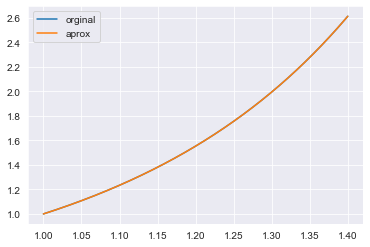

In [39]:
#plotting
r = np.linspace(1, 1.4, 1000)
org = fu(r)

n = len(r)
pnY = np.zeros(n)
for i in range(n):
    pnY[i] = pn(r[i], X, Y)

print(len(r), len(pnY))

plt.plot(r,org, label = 'orginal')
plt.plot(r, pnY, label = 'aprox')
plt.legend()
plt.show()

In [14]:
valueF = np.exp(1.25**2-1)
print(np.abs(valueF - p4))


9.371946029856915e-05


In [40]:
def prim5(data):
    n =len(data)
    res_list = np.zeros(n)

    for i in range(n):
        x = data[i]
        res_list[i] = 8 * np.exp(x**2-1) * x * (8* x**4 +34* x**2 +21)
    return res_list

In [47]:
aprox = np.max(np.abs(prim5(X)))
aprox

3462.5228322632624

In [48]:
#błąd interpolacyjny

def interpol_er(x, X, aprox):
    
    it_sum = 1
    for i in range(len(X)):
        it_sum *= x - X[i]
    result = 1/np.math.factorial(len(X)) * aprox *  it_sum
    return result

[1, 1.1, 1.2, 1.3, 1.4]

In [54]:
interpol_er(1.25, X, aprox)


0.00040576439440585127

### Zadanie domowe

In [2]:
#a)
n = 1000
t = np.linspace(0, 2*np.pi, 1000)
a = 2 
b = 1 

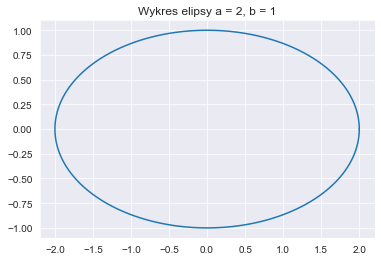

In [3]:
x = np.zeros(n)
y = np.zeros(n)

for i in range(n):
    x[i] = a*np.cos(t[i])
    y[i] = b*np.sin(t[i])

plt.plot(x, y)
plt.title(f'Wykres elipsy a = {a}, b = {b}')
plt.show()

In [4]:
def f(t, a, b):
    
    x_t, y_t = a*np.cos(t), b*(np.sin(t))

    return x_t, y_t 

In [74]:
#b

n = 100
h = 2*np.pi/n
k = np.linspace(0,n, n + 1)

t_k = h * k #węzły interpolacji

In [69]:
result = f(t_k, a, b)

y_i = result[0] #y_i = a*cos(t)
t = np.linspace(0, 2*np.pi, n+1)

In [46]:
def wn(x, y, x_aprox):
    n = len(x)
    
    result = 0

    for i in range(n): #summation
        
        li = 1
        for j in range(n): #multiplication
            if j == i:
                continue 
            
            li *= (x_aprox - x[j])/(x[i] - x[j])
        

        result += y[i] *li
    
    return result

In [51]:
pn = np.zeros(n+1)
#wn(t_k, y_i, t[4])

for i in range(n+1):
    pn[i] = wn(t_k, y_i, t[i])


In [67]:
print('Wartość pn', pn[:5])

Wartość pn [2.         1.99605346 1.9842294  1.9645745  1.93716632]


In [55]:
y_i2 = result[1]

qn = np.zeros(n+1)

for i in range(n+1):
    qn[i] = wn(t_k, y_i2, t[i])

In [68]:
print('Wartość qn', qn[:5])

Wartość qn [0.         0.06279052 0.12533323 0.18738131 0.24868989]


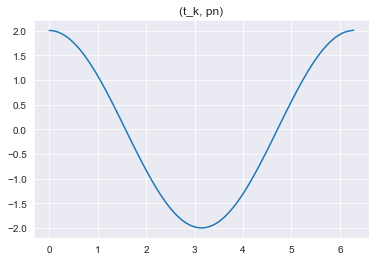

In [59]:
plt.plot(t_k, pn)
plt.title('(t_k, pn)')
plt.show()

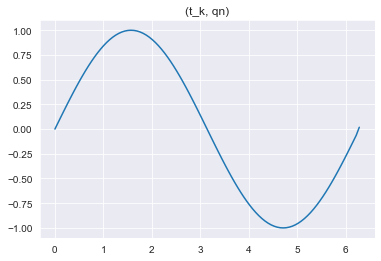

In [58]:
plt.plot(t_k, qn)
plt.title('(t_k, qn)')
plt.show()

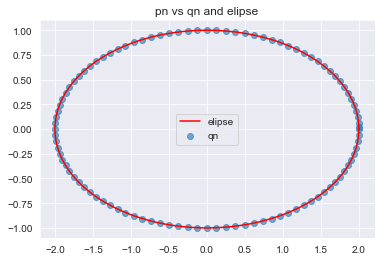

In [65]:
plt.scatter(pn, qn, label = 'qn', alpha = 0.6)
plt.plot(x, y, label = 'elipse', color = 'red')
plt.legend()
plt.title('pn vs qn and elipse')
plt.show()

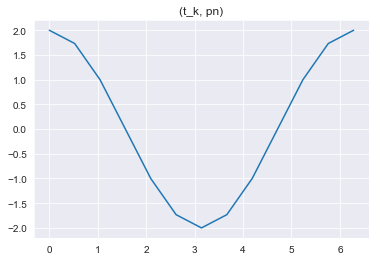

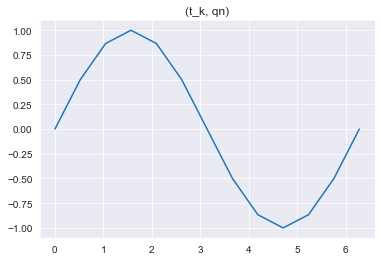

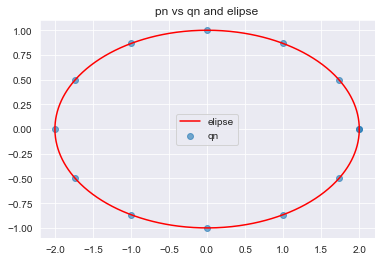

In [84]:
n = 12
h = 2*np.pi/n
k = np.linspace(0,n, n + 1)

t_k = h * k
result = f(t_k, a, b)

y_i = result[0] #y_i = a*cos(t)

t = np.linspace(0, 2*np.pi, n+1)

pn = np.zeros(n+1)
#wn(t_k, y_i, t[4])

for i in range(n+1):
    pn[i] = wn(t_k, y_i, t[i])

y_i2 = result[1]

qn = np.zeros(n+1)

for i in range(n+1):
    qn[i] = wn(t_k, y_i2, t[i])

plt.plot(t_k, pn)
plt.title('(t_k, pn)')
plt.show()

plt.plot(t_k, qn)
plt.title('(t_k, qn)')
plt.show()

plt.scatter(pn, qn, label = 'qn', alpha = 0.6)
plt.plot(x, y, label = 'elipse', color = 'red')
plt.legend()
plt.title('pn vs qn and elipse')
plt.show()

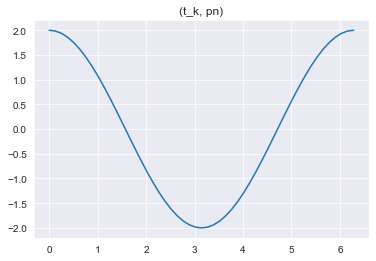

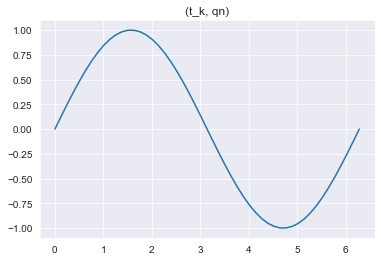

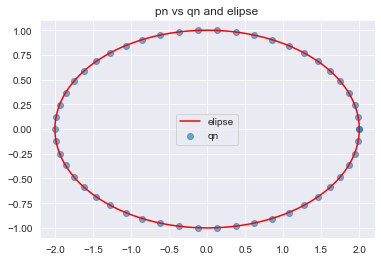

In [85]:
n = 50
h = 2*np.pi/n
k = np.linspace(0,n, n + 1)

t_k = h * k
result = f(t_k, a, b)

y_i = result[0] #y_i = a*cos(t)

t = np.linspace(0, 2*np.pi, n+1)

pn = np.zeros(n+1)
#wn(t_k, y_i, t[4])

for i in range(n+1):
    pn[i] = wn(t_k, y_i, t[i])

y_i2 = result[1]

qn = np.zeros(n+1)

for i in range(n+1):
    qn[i] = wn(t_k, y_i2, t[i])

plt.plot(t_k, pn)
plt.title('(t_k, pn)')
plt.show()

plt.plot(t_k, qn)
plt.title('(t_k, qn)')
plt.show()

plt.scatter(pn, qn, label = 'qn', alpha = 0.6)
plt.plot(x, y, label = 'elipse', color = 'red')
plt.legend()
plt.title('pn vs qn and elipse')
plt.show()